## 메모이제이션 (Memoization)

- 컴퓨터 프로그램을 실행할 떄 이전에 계산한 값을, 메모리에 저장함 으로써, 동일한 계산의 반복 수행을 제거하여, 전체적인 실행속도를 빠르게 하는 기술입니다.
    - 같은 함수 or 문제를 다시 호출하게 된다면, 메모리에서 저장했었던 것 그대로 가져옵니다.
    - 값을 기록해 놓는다는 점에서 Caching(캐싱) 이라고도 합니다.

- DP (동적 계획법)의 핵심 기술

- memoize <-> memorization (기억하기 암기하기 )이랑 다름 

    - top-down (하향식) - Memoization
    - bottom-up (상향식) - DP

---

# Dynamic_Programming

- 그리디 알고리즘과 같이 최적화 문제를 해결하는 알고리즘

- 먼저 입력 크기가 작은 부분 문제들을 모두 해결한 후에, 그 해들을 이용하여, 보다 큰 크기의 부분 문제들을 해결

- 최종적으로 원래 주어진 입력의 문제를 해결

- 이미 계산된 결과(작은 문제)는 별도의 메모리 영역 dp 테이블의 저장하여, 다시 계산 하지 않도록 처리
    - 메모리를 적절히 사용하여, 수행 시간 효율성을 비약적으로 향상
    
    - 동적 할당(Dynamic Allocation)은 프로그램이 실행되는 도중에, 실행에 필요한 메모리를 할당하는 기법


---

## DP 풀이

1. 문제를 부분 문제로 분할 > 점화식 생성
    - 시각적으로 손으로 시뮬레이션 접근 > 규칙성(반복) > 점화식 (인접한 항들 사이의 관계식) 

2. 가장 작은 부분 문제 부터 해를 구함
    - dp[] 테이블 정의, 초기값, 초기식 설정 및 처리

3. 그 결과를 dp 테이블에 저장, 테이블에 저장된 부분 문제들의 해를 이용하여, 상위 문제의 해 처리
    - iterative 반복 처리
    
  

---


## DP 수행 조건


1. Optimal Substructure (최적 부분 구조)
    - 큰 문제를 작은 문제로 나눌수 있으며, 작은 문제의 답을 모아서 큰 문제 해결

2. Overlapping Subproblem (중복되는 부분 문제)
    - 동일한 작은 문제를 반복적으로 처리해야 하는 경우,

---

## DP 구현 방식

- memoization을 어떻게 구현할 것인가 ?

1. 재귀 (recursive) 처리 : 재귀적 구조는 내부에 시스템 호출 스택을 사용하는 overhead가 발생할 수 있음
    - Top down DP : 큰 문제를, 작은 부분 문제로 나누어, 재귀적으로 호출,
    - 작은 부분 문제 결과를 메모이제이션하여, 동일한 부분 문제를 한 번만 계산합니다.

2. 반복 (iterative) 처리 : 성능 면에서 보다 효율적, 재귀적 구조로 처리 하는 것보다
    - Bottom up DP : 작은 문제부터 시작하여 반복문을 사용해 큰 문제를 해결하는 방식.
    - 작은 부분 문제 결과를 메모이제이션하여, 동일한 부분 문제를 한 번만 계산합니다.


---

## fibo (단순 recur)

- 재귀로 처리 > 엄청난 함수 콜 중복 > 지수 시간 복잡도
    - f(2)를 계속해서 처리해야 함. 
    - Overlapping Subproblem 
 

In [4]:
# 피보나치 함수(Fibonacci Function)을 재귀함수로 구현

def fibo(x):
    
    print(f'f({x})')

    if x == 1 or x == 2:
        return 1
    
    return fibo(x - 1) + fibo(x - 2)

print(fibo(6))

f(6)
f(5)
f(4)
f(3)
f(2)
f(1)
f(2)
f(3)
f(2)
f(1)
f(4)
f(3)
f(2)
f(1)
f(2)
8


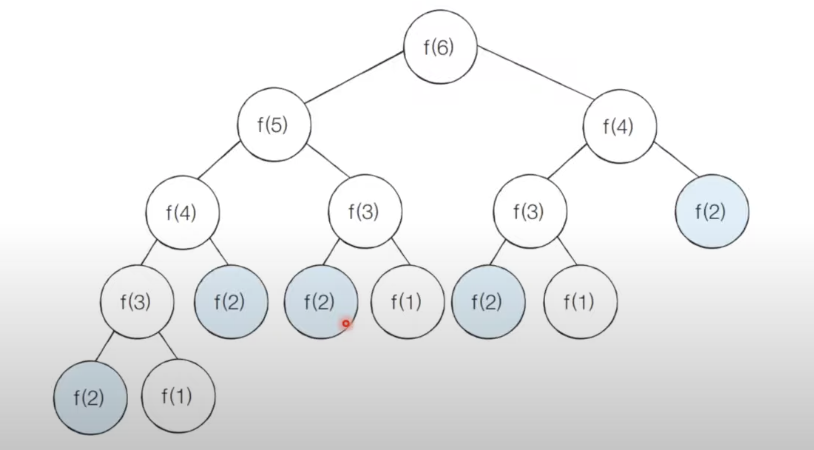

---

## fibo (Memoization-recur)  

- Top-Down (하향식) :  큰 문제를 해결하기 위해, 작은 부분 문제를 재귀적으로 호출 처리 하고, 결과를 메모이제이션하여 동일한 부분 문제를 한 번만 처리 하게 함
    
    - 큰 문제 fibo(x) 를 작은 부분 문제로 fibo(x - 1) + fibo(x - 2) 나누어 재귀적으로 처리


- 피보나치 수를 구하는 알고리즘에서, fibo(n)의 값을 계산하자 마자, 메모리에 저장하여, 중복 호출을 줄여, 실행시간을 줄일 수 있다.

- 시간 복잡도 O(N)

In [3]:
def fibo(x):
    
    
    # 1-1) 재귀 종료 조건 처리 
    if x == 1 or x == 2:
        return 1
    
    # 1-3) fibo 호출 전에 미리 Memoization 확인
    # 기존 dp테이블에 저장된 값이 있다면, 다시 계산하지 않고, return 처리
    
    if dp[x] != 0:
        return dp[x]
    
    print(f'f({x})')

    
    # 1-2) 점화식 처리, fibo(n)의 값을 계산하자 마자, dp 테이블에 저장
    dp[x] = fibo(x - 1) + fibo(x - 2)
    
    return dp[x]

# 메모이제이션(Memoization)하기 위한 dp 테이블 생성
dp = [0] * 100

print(fibo(6))

f(6)
f(5)
f(4)
f(3)
8


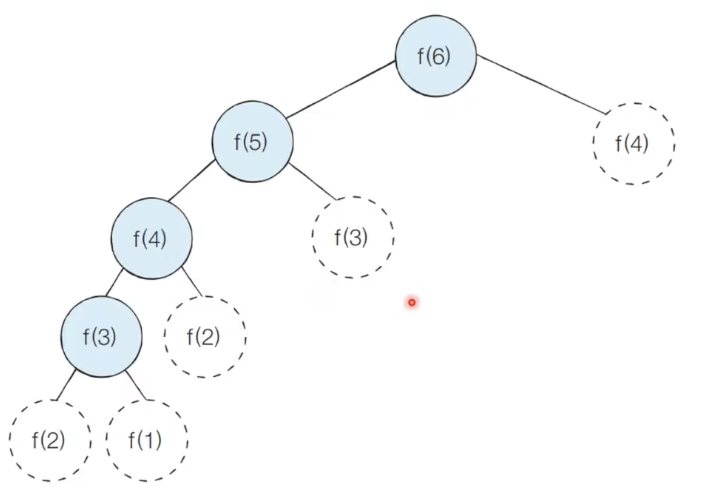

---

## fibo (Memoization - iterative) (DP) 

- bottom-up (상향식) : 작은 문제부터 시작하여, 결과를 메모이 제이션 하며, 반복문을 사용하여, 큰 문제를 해결하는 방식.
    - 작은 문제 초기 값, 초기식 dp[1], dp[2] = 1, 1 부터, 반복문을 통해 상위 문제들 처리 


1. 문제를 부분 문제로 분할 > 점화식 생성

    - fibo(n) 은 fibo(n-1) 과 fibo(n-2) 의 합, 
    - fibo(n-1)은 fibo(n-2) + fibo(n-3) 
    

2. 가장 작은 부분 문제 부터 해를 구함( 초기값, 초기식 처리 )
    - fibo(1), fibo(2) = 1, 1 처리 

3. 그 결과를 dp 테이블에 저장, 테이블에 저장된 부분 문제들의 해를 이용하여, 상위 문제의 해 처리



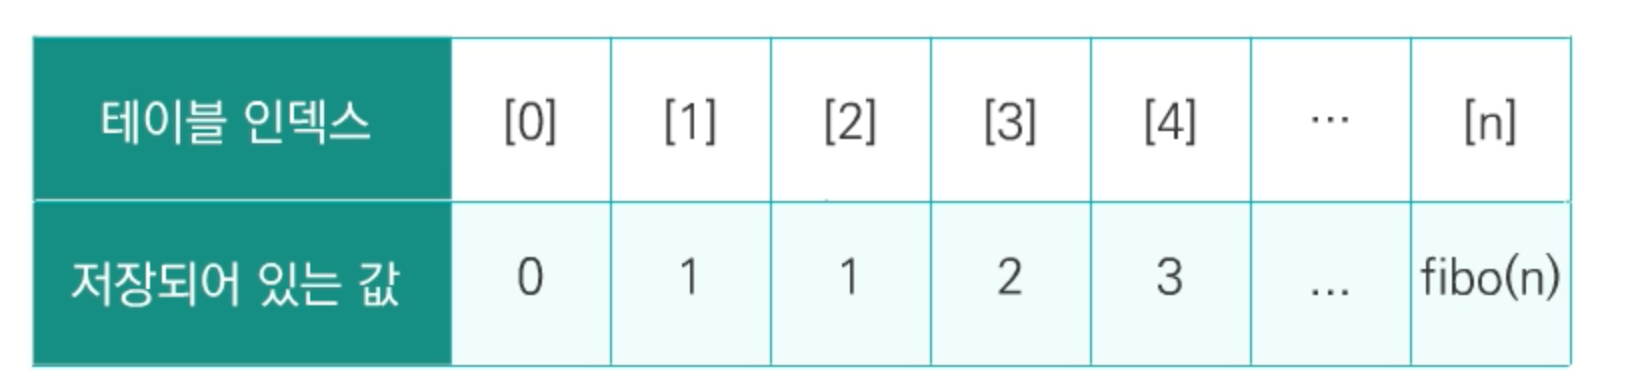

In [6]:
# 1-1) dp 테이블 정의 앞서 계산된 결과를 저장하기 위한
# 1-2) 초기 값 설정 

dp = [0] * 100
dp[1], dp[2] = 1, 1

n = 6

# 1-3) 점화식 처리 
# 작은 부분 문제들 (초기값을 제외한 3)부터 시작해서, 상위 문제 처리 bottom-up (상향식)

for i in range(3, n+1):
    
    dp[i] = dp[i - 1] + dp[i - 2]

print(dp[n])

8


---